# 1. PyTorch Installation

_NOTE_: If you run this notebook on Google Colab or any similar services, there's a possibility that they might have `pytorch` package installed. But if it's on a local machine, run the following cells (depends on what type of machine you have)

## 1.1. CPU

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cpu


## 1.2. GPU (an alternative to 1.1, if you have a high-end NVIDIA GPU with support of CUDA)

In [ ]:
!pip3 install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu113

# 2. Checking for models and downloading them

_NOTE_: If you have downloaded the models from our [repository], then just create a folder called `models` and put your model files inside it. Otherwise, run the following cells

In [8]:
import os

if 'models' in os.listdir():
    if os.listdir('models'):
        print('Models are there, where are you?')
    else:
        !cd models && wget https://persianocr.cam/models/letters.pt
        !cd models && wget https://persianocr.cam/models/numbers.pt
else:
    os.mkdir('models')
    !cd models && wget https://persianocr.cam/models/letters.pt
    !cd models && wget https://persianocr.cam/models/numbers.pt

Models are there, where are you?


# 3. Loading the models for inference and testing

## 3.1. Importing libraries

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch

## 3.2. Resolving SSL problem (Optional and Occasional)

Only run this cell if:

1. You're on a Mac. Most of macOS users got errors regarding SSL problems (so did I)
2. You get SSL related errors in other OSs. 

If you're on Colab or similar services, you obviously don't need this cell.

In [10]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

## 3.3. Functions for text extraction

### 3.3.1. Numbers

In [11]:
_translator = str.maketrans("1234567890", "۱۲۳۴۵۶۷۸۹۰")

In [12]:
def latin_to_persian(number):
    return number.translate(_translator)

In [13]:
def extract_chars(result):
    df = result.pandas().xyxy[0] # because we only need the first one
    df = df.sort_values('xmin') # sorts them write to left'
    
    output_string = []
    for name, confidence in zip(df['name'], df['confidence']):
        if confidence > 0.8:
            output_string.append(name)
            
    output_string = ''.join(output_string)
    output_string = latin_to_persian(output_string)
    return output_string

### 3.3.2. Letters

In [14]:
inference_letters = {'alef': 'ا',
 'be': 'ب',
 'pe': 'پ',
 'te': 'ت',
 'the': 'ث',
 'jim': 'ج',
 'che': 'چ',
 'he': 'ح',
 'khe': 'خ',
 'dal': 'د',
 'zal': 'ذ',
 're': 'ر',
 'ze': 'ز',
 'zhe': 'ژ',
 'sin': 'س',
 'shin': 'ش',
 'sad': 'ص',
 'zad': 'ض',
 'ta': 'ط',
 'za': 'ظ',
 'ein': 'ع',
 'qein': 'غ',
 'fe': 'ف',
 'quf': 'ق',
 'kaf': 'ک',
 'gaf': 'گ',
 'lam': 'ل',
 'mim': 'م',
 'nun': 'ن',
 'vav': 'و',
 'he_docheshm': 'ه',
 'ye': 'ی'}

In [16]:
def extract_letters(result):
    df = result.pandas().xyxy[0]
    df = df.sort_values('xmin')
    
    letters = []
    
    for confidence, name in zip(df['confidence'], df['name']):
        if confidence > 0.9:
            letters.append(inference_letters[name])
            
    letters = [letter for letter in reversed(letters)]
            
    return ''.join(letters)

## 3.4. Load models

In [27]:
letter_model = model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/letters.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-23 Python-3.8.6 torch-1.10.0 CPU

Fusing layers... 
Model summary: 290 layers, 20978205 parameters, 0 gradients, 48.3 GFLOPs
Adding AutoShape... 


In [18]:
number_model = letter_model = model = torch.hub.load('ultralytics/yolov5', 'custom', path='models/numbers.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /Users/prp-e/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-6-23 Python-3.8.6 torch-1.10.0 CPU

Fusing layers... 
Model summary: 290 layers, 20889303 parameters, 0 gradients, 48.1 GFLOPs
Adding AutoShape... 


## 3.5. Importing samples from the repository

_NOTE_: You simply can add your own desired images here. We've just used an inference picture to demonstrate how it works.

In [19]:
numbers_image = cv2.imread('number_inference.png')

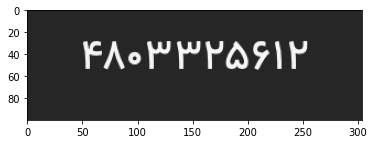

In [20]:
%matplotlib inline

plt.imshow(numbers_image)

In [21]:
letters_image = cv2.imread('letter_inference_2.png')

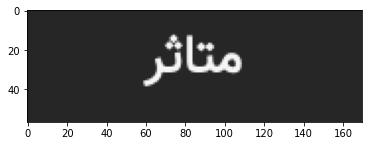

In [22]:
%matplotlib inline

plt.imshow(letters_image)

## 3.6. Run the inference

In [28]:
numbers_result = number_model(numbers_image)
letter_result = letter_model(letters_image)

In [29]:
extract_chars(numbers_result)

'۴۸۰۳۳۲۵۶۱۲'

In [31]:
extract_letters(letter_result)

'متاثر'

# Final Thoughts

This notebook is just a tool to put what we've done to the test. It's not official release of the tool yet and we're going to work on some other tools including:

1. A CLI tool (similar to _tesseract_)
2. A web service
3. A python library for developers

And of course there'll be changes in pretty much everything you've seen in the repo. We're trying to improve the product for good.